In [1]:
# from __future__ import division
import itertools

# To get rid of those blocks of red warnings
import warnings
warnings.filterwarnings("ignore")

# Standard Imports
import numpy as np
from scipy import stats
import pandas as pd
from math import sqrt
import os
from scipy.stats import spearmanr
from sklearn import metrics
from random import randint
from typing import Dict, List, Optional, Union, cast

# Vis Imports
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import plotly.express as px
from pandas.plotting import register_matplotlib_converters
from mpl_toolkits.mplot3d import Axes3D
from wordcloud import WordCloud

# Modeling Imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression, RFE
import sklearn.preprocessing
import statsmodels.api as sm
from sklearn.cluster import DBSCAN
from time import sleep
from random import randint

# NLP Imports
import unicodedata
import re
import json
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

# Custom Module Imports
from env import github_token, github_username
import acquire
import prepare
import explore
#import model

## Acquire

In [2]:
#acquiring data from the csv file 
df = pd.read_csv('languages.csv')

In [3]:
#check shape
df.shape

(160, 4)

In [4]:
#check dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       160 non-null    int64 
 1   repo             160 non-null    object
 2   language         160 non-null    object
 3   readme_contents  159 non-null    object
dtypes: int64(1), object(3)
memory usage: 5.1+ KB


In [5]:
#check head structure
df.head()

,Unnamed: 0,repo,language,readme_contents
0,0,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot..."
1,1,nightscout/cgm-remote-monitor,JavaScript,Nightscout Web Monitor (a.k.a. cgm-remote-moni...
2,2,github/docs,JavaScript,# GitHub Docs <!-- omit in toc --> \n\nThis re...
3,3,facebook/react,JavaScript,# [React](https://reactjs.org/) &middot; [![Gi...
4,4,RedHatTraining/DO180-apps,JavaScript,# DO180-apps\nDO180 Repository for Sample Appl...


In [6]:
#check the dataframe
df = pd.DataFrame(df)
df

,Unnamed: 0,repo,language,readme_contents
0,0,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot..."
1,1,nightscout/cgm-remote-monitor,JavaScript,Nightscout Web Monitor (a.k.a. cgm-remote-moni...
2,2,github/docs,JavaScript,# GitHub Docs <!-- omit in toc --> \n\nThis re...
3,3,facebook/react,JavaScript,# [React](https://reactjs.org/) &middot; [![Gi...
4,4,RedHatTraining/DO180-apps,JavaScript,# DO180-apps\nDO180 Repository for Sample Appl...
...,...,...,...,...
155,155,mongodb/mongo,C++,# ![Logo](docs/leaf.svg) MongoDB README\n\nWel...
156,156,ClickHouse/ClickHouse,C++,[![ClickHouse — open source distributed column...
157,157,ceph/ceph,C++,\nLast updated: 2017-04-08\n\nThe FreeBSD buil...
158,158,facebook/folly,C++,Folly: Facebook Open-source Library\n=========...


## Prepare
### Using the prep_readme_function we will:

- normalize data by removing non ASCII characters
- tokenize words
- lemmatize words
- remove stop words

In [7]:
#function to prepare our data for modeling
df = prepare.prep_readme_data(df)

In [8]:
df.describe()

,repo,language,readme_contents,clean_tokes,clean_lemmatized
count,160,160,159,160,160
unique,160,4,159,160,159
top,twbs/bootstrap,JavaScript,"<p align=""center""> <a href=""https://getboots...","[p, aligncenter, a, hrefhttpsgetbootstrapcom, ...",
freq,1,40,1,1,2


In [9]:
#look at dataframe structure
df.head(5)

,repo,language,readme_contents,clean_tokes,clean_lemmatized
0,twbs/bootstrap,JavaScript,"<p align=""center""> <a href=""https://getboots...","[p, aligncenter, a, hrefhttpsgetbootstrapcom, ...",p aligncenter img altbootstrap logo width200 h...
1,nightscout/cgm-remote-monitor,JavaScript,Nightscout Web Monitor (a.k.a. cgm-remote-moni...,"[nightscout, web, monitor, aka, cgmremotemonit...",nightscout web monitor aka nightscout build de...
2,github/docs,JavaScript,# GitHub Docs <!-- omit in toc --> This repo...,"[github, docs, omit, in, toc, this, repository...",github doc omit toc repository contains websit...
3,facebook/react,JavaScript,# [React](https://reactjs.org/) &middot; [![Gi...,"[reacthttpsreactjsorg, middot, github, license...",middot github npm circleci pr react javascript...
4,RedHatTraining/DO180-apps,JavaScript,# DO180-apps DO180 Repository for Sample Appli...,"[do180apps, do180, repository, for, sample, ap...",do180apps do180 repository sample application


In [10]:
#Take a look at languages
df.language.value_counts(dropna=False)

JavaScript    40
Python        40
Java          40
C++           40
Name: language, dtype: int64

In [11]:
df.readme_contents = df.readme_contents.dropna()

In [12]:
#drop na and create is_top_language column
df = prepare.prepare_data(df)

In [13]:
#peek at the datafram
df.head(5)

,repo,language,readme_contents,clean_tokes,clean_lemmatized,is_top_language
1,nightscout/cgm-remote-monitor,JavaScript,Nightscout Web Monitor (a.k.a. cgm-remote-moni...,"[nightscout, web, monitor, aka, cgmremotemonit...",nightscout web monitor aka nightscout build de...,JavaScript
2,github/docs,JavaScript,# GitHub Docs <!-- omit in toc --> This repo...,"[github, docs, omit, in, toc, this, repository...",github doc omit toc repository contains websit...,JavaScript
3,facebook/react,JavaScript,# [React](https://reactjs.org/) &middot; [![Gi...,"[reacthttpsreactjsorg, middot, github, license...",middot github npm circleci pr react javascript...,JavaScript
4,RedHatTraining/DO180-apps,JavaScript,# DO180-apps DO180 Repository for Sample Appli...,"[do180apps, do180, repository, for, sample, ap...",do180apps do180 repository sample application,JavaScript
5,mrdoob/three.js,JavaScript,# three.js [![NPM Package][npm]][npm-url] [![...,"[threejs, npm, packagenpmnpmurl, build, sizebu...",threejs npm build npm javascript 3d library ai...,JavaScript


In [14]:
#Take a look at languages again using our new column
df.is_top_language.value_counts(dropna=False)

Java          34
JavaScript    31
C++           31
Python        27
Name: is_top_language, dtype: int64

In [15]:
# Let's add some numerical features that we can use for the exploration phase

df["word_count"] = df.clean_lemmatized.apply(explore.word_count)
df["digit_count"] = df.clean_lemmatized.apply(explore.digit_count)

In [16]:
df.head()

,repo,language,readme_contents,clean_tokes,clean_lemmatized,is_top_language,word_count,digit_count
1,nightscout/cgm-remote-monitor,JavaScript,Nightscout Web Monitor (a.k.a. cgm-remote-moni...,"[nightscout, web, monitor, aka, cgmremotemonit...",nightscout web monitor aka nightscout build de...,JavaScript,4404,186
2,github/docs,JavaScript,# GitHub Docs <!-- omit in toc --> This repo...,"[github, docs, omit, in, toc, this, repository...",github doc omit toc repository contains websit...,JavaScript,190,3
3,facebook/react,JavaScript,# [React](https://reactjs.org/) &middot; [![Gi...,"[reacthttpsreactjsorg, middot, github, license...",middot github npm circleci pr react javascript...,JavaScript,289,0
4,RedHatTraining/DO180-apps,JavaScript,# DO180-apps DO180 Repository for Sample Appli...,"[do180apps, do180, repository, for, sample, ap...",do180apps do180 repository sample application,JavaScript,5,2
5,mrdoob/three.js,JavaScript,# three.js [![NPM Package][npm]][npm-url] [![...,"[threejs, npm, packagenpmnpmurl, build, sizebu...",threejs npm build npm javascript 3d library ai...,JavaScript,154,17


In [17]:
# Remove any outliers
df = df[df.word_count < 4500]

In [18]:
# What's the shape of our final dataset?
df.shape

(118, 8)

## Exploration

In [19]:
# let us view the distribution of all languages in a dataframe
pd.concat(
    [df.language.value_counts(), df.language.value_counts(normalize=True)], axis=1
    ).set_axis(['n', 'percent'], axis=1, inplace=False)

,n,percent
Java,34,0.288136
JavaScript,30,0.254237
C++,30,0.254237
Python,24,0.203390


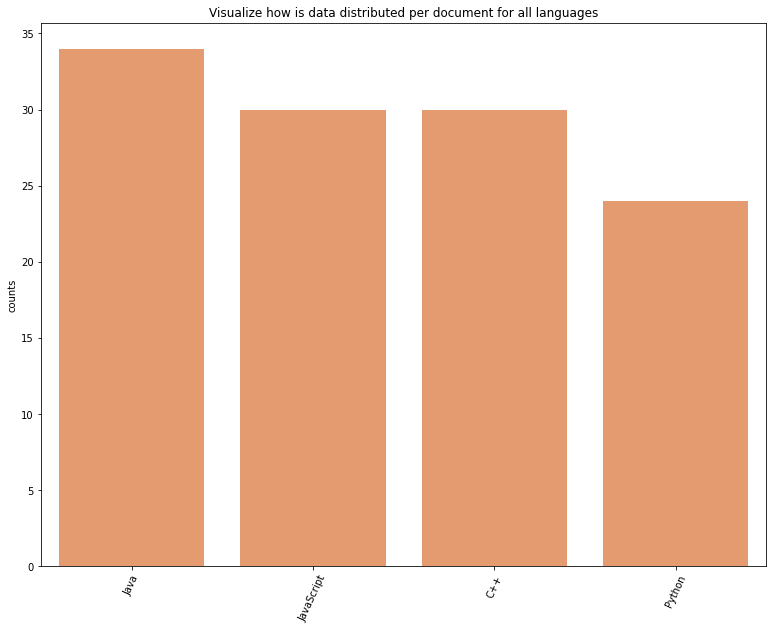

In [20]:
#let's plot the distribution for the languages
explore.plot_distro_for_value_counts_all(df)

## REAMDE lengths by language

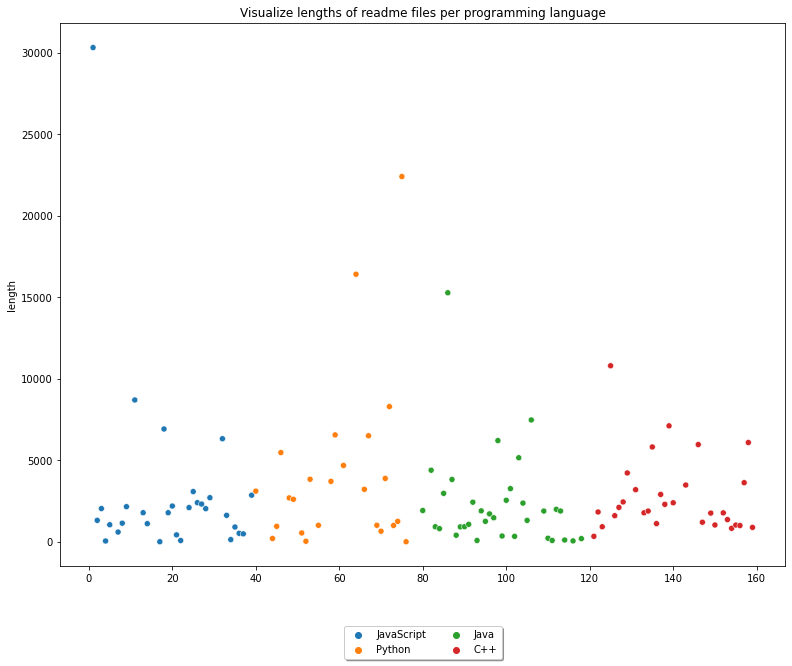

In [21]:
#let's visualize in a scatterplot various readmes lengths hued language
explore.scatterplot_for_readmes(df)

- Overall the length of the readme's seem to be relatively similar

## Visualize medians, min, and max

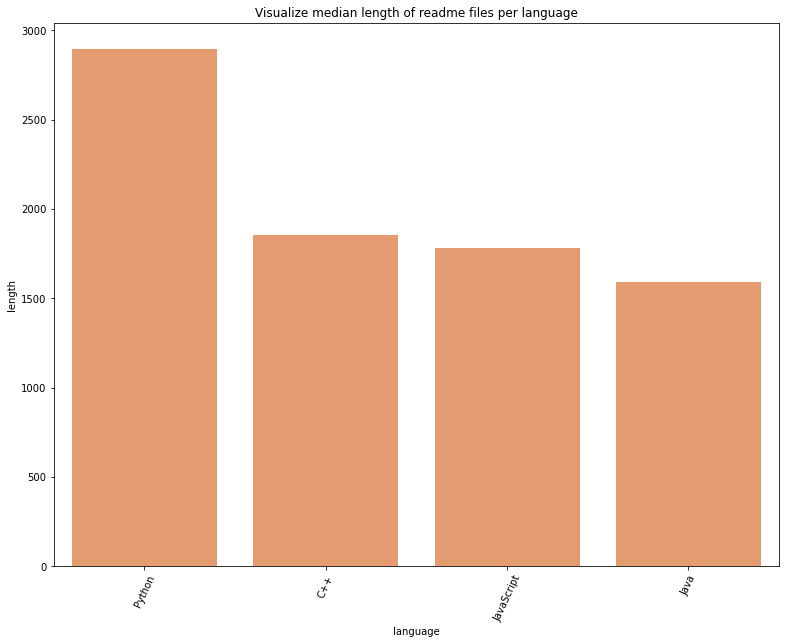

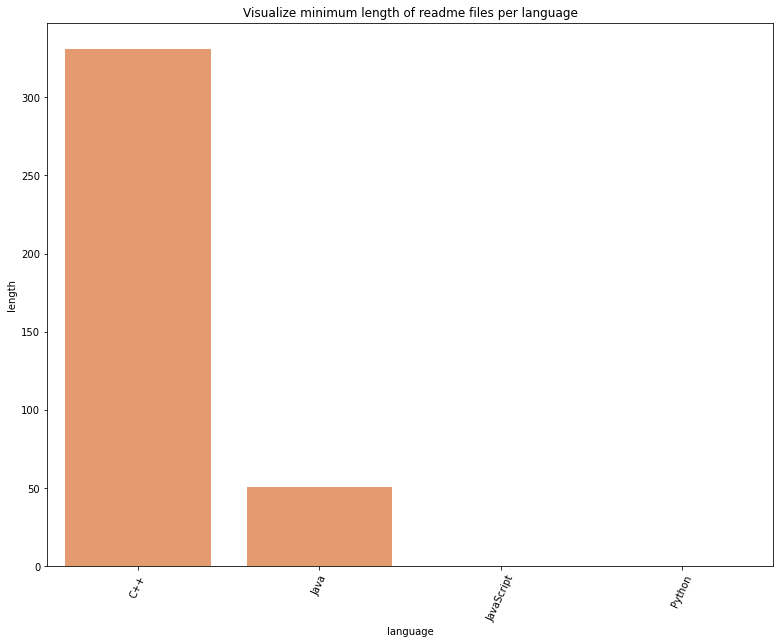

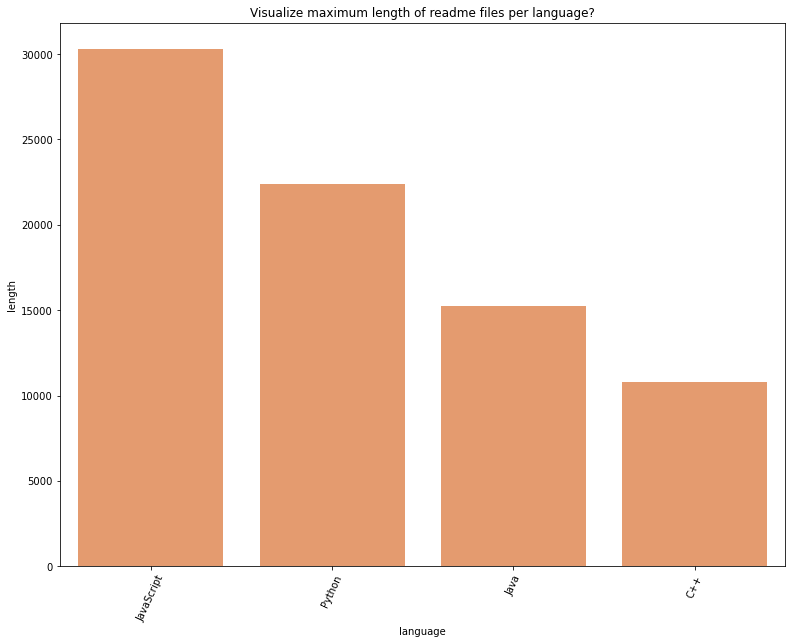

In [22]:
#let's plot the lengths of readmes for all languages
explore.bargraphs_for_min_max_median(df)

## Bigrams

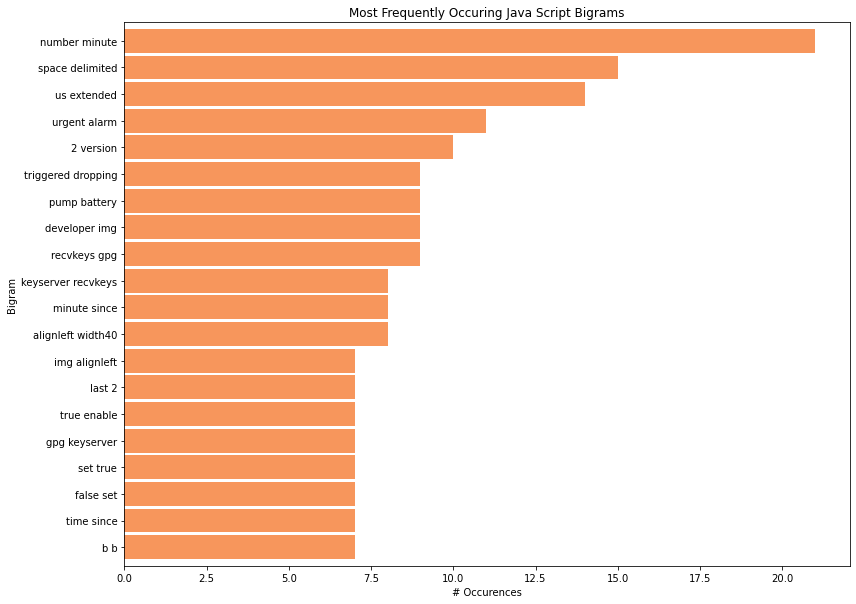

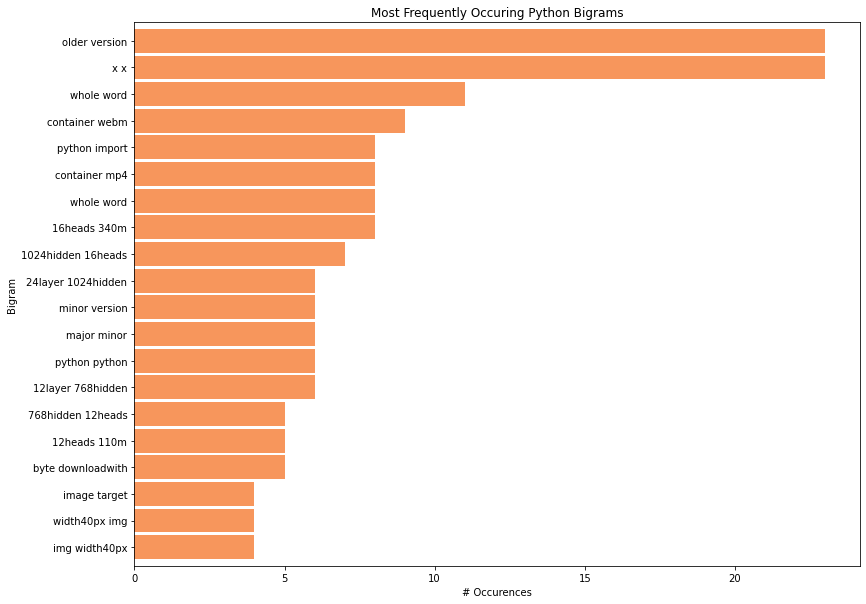

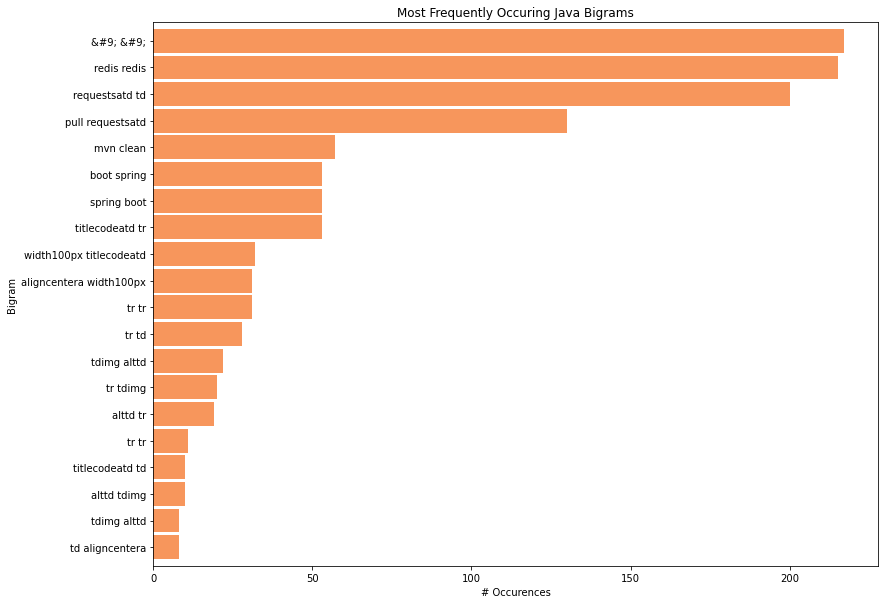

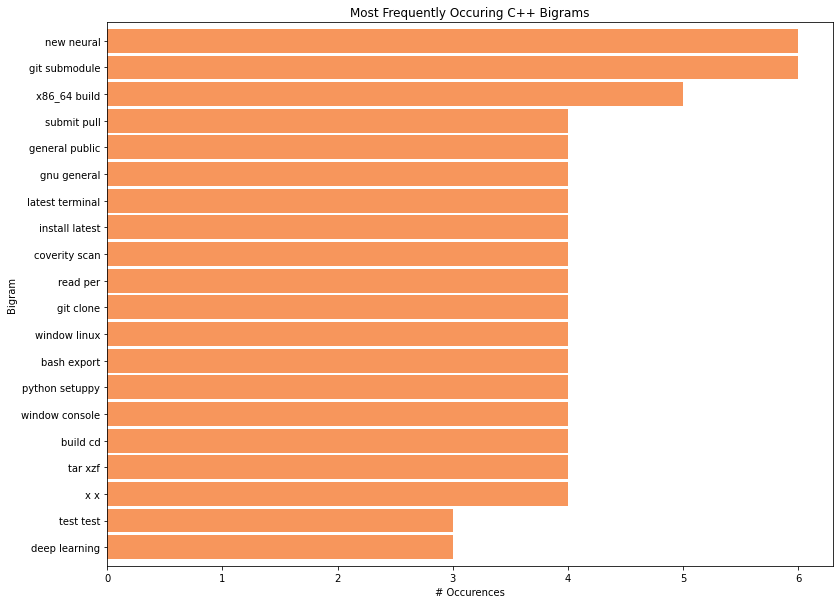

In [23]:
#plot the bigrams for top languages
explore.plot_bigrams(df)

In [24]:
df.head(1)

,repo,language,readme_contents,clean_tokes,clean_lemmatized,is_top_language,word_count,digit_count
1,nightscout/cgm-remote-monitor,JavaScript,Nightscout Web Monitor (a.k.a. cgm-remote-moni...,"[nightscout, web, monitor, aka, cgmremotemonit...",nightscout web monitor aka nightscout build de...,JavaScript,4404,186


In [25]:
javascript = df[df.language=='JavaScript'].clean_lemmatized

## Word Clouds

In [26]:
#python -m pip install --upgrade wordcloud

#documentation: https://amueller.github.io/word_cloud/

In [27]:
from wordcloud import WordCloud

In [28]:
#Define my languages
Java_words = (' '.join(df[df.language=='Java'].clean_lemmatized))
JavaScript_words = (' '.join(df[df.language=='JavaScript'].clean_lemmatized))
Cplus_words = (' '.join(df[df.language=='C++'].clean_lemmatized))
Python_words = (' '.join(df[df.language=='Python'].clean_lemmatized))


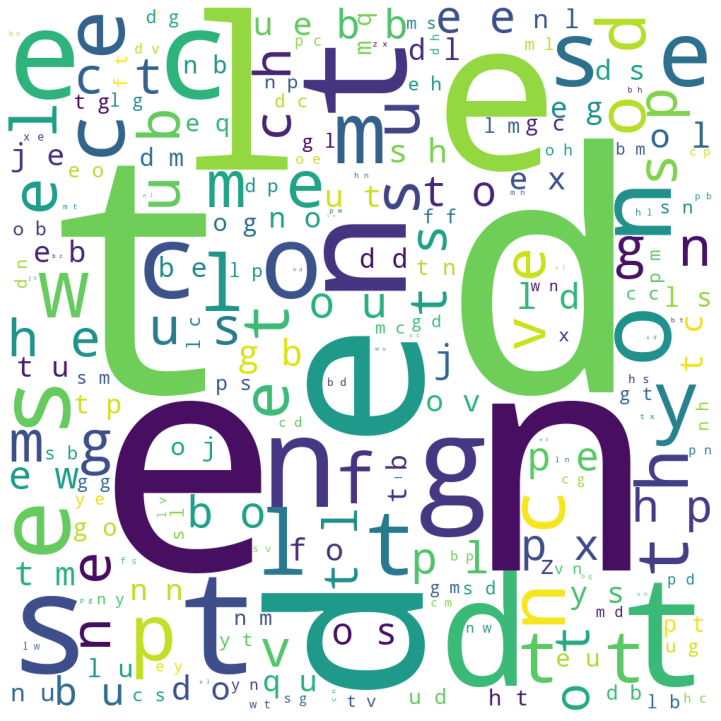

In [29]:
# Plot Java word cloud
explore.word_cloud(Java_words)

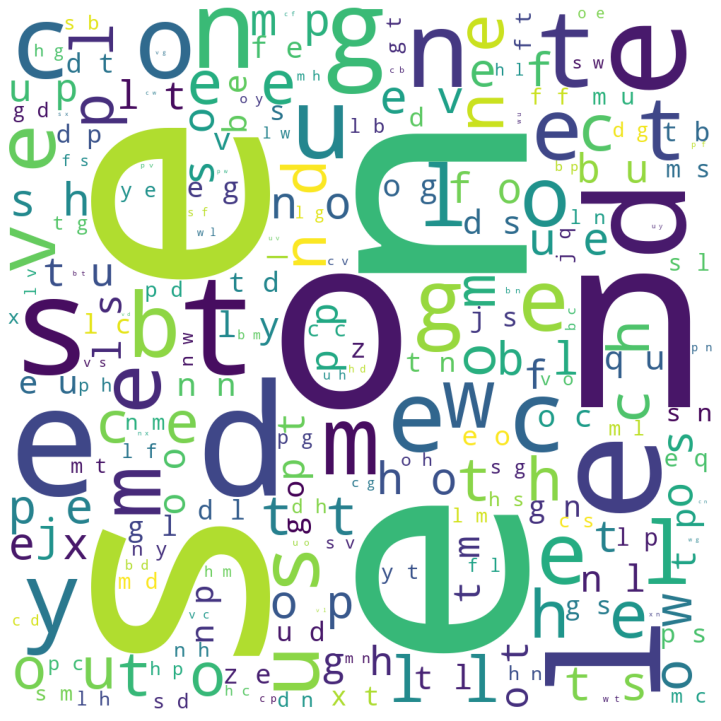

In [30]:
# Plot JavaScript word cloud
explore.word_cloud(JavaScript_words)

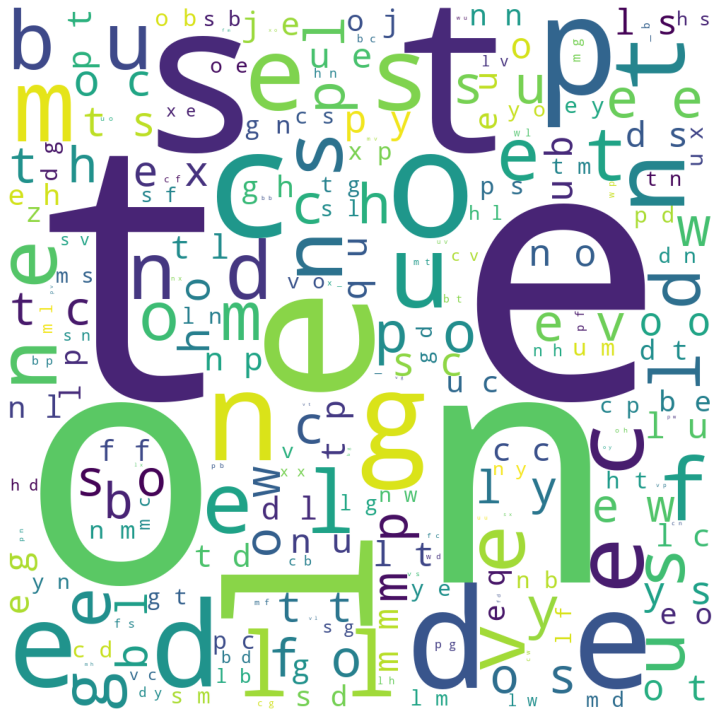

In [31]:
#Plot C++ word cloud
explore.word_cloud(Cplus_words)

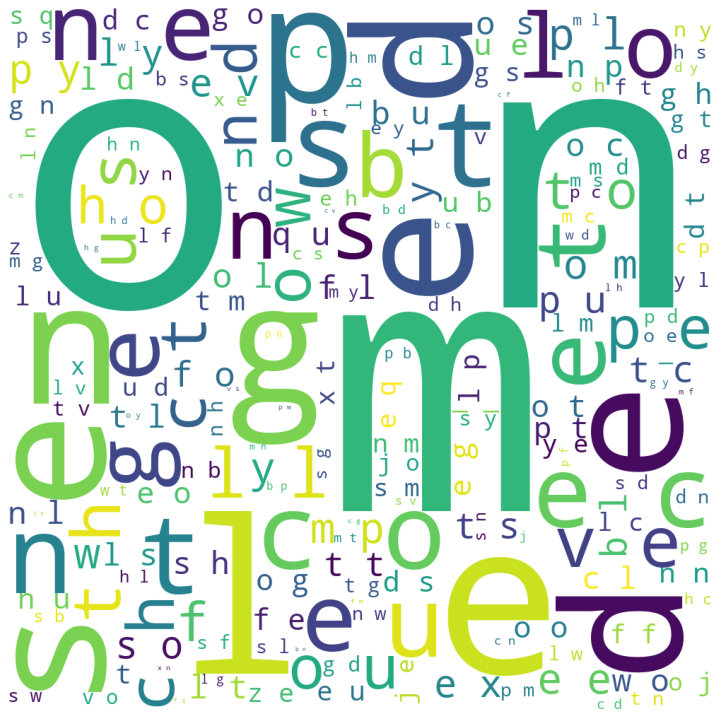

In [32]:
#Plot Pyhton word cloud
explore.word_cloud(Python_words)

In [33]:
#checking the most frequent word by languages
df.groupby("is_top_language").clean_lemmatized.agg(["count", explore.most_frequent_word])

,count,most_frequent_word
is_top_language,,
C++,30,build
Java,34,tdimg
JavaScript,30,hehim
Python,24,python


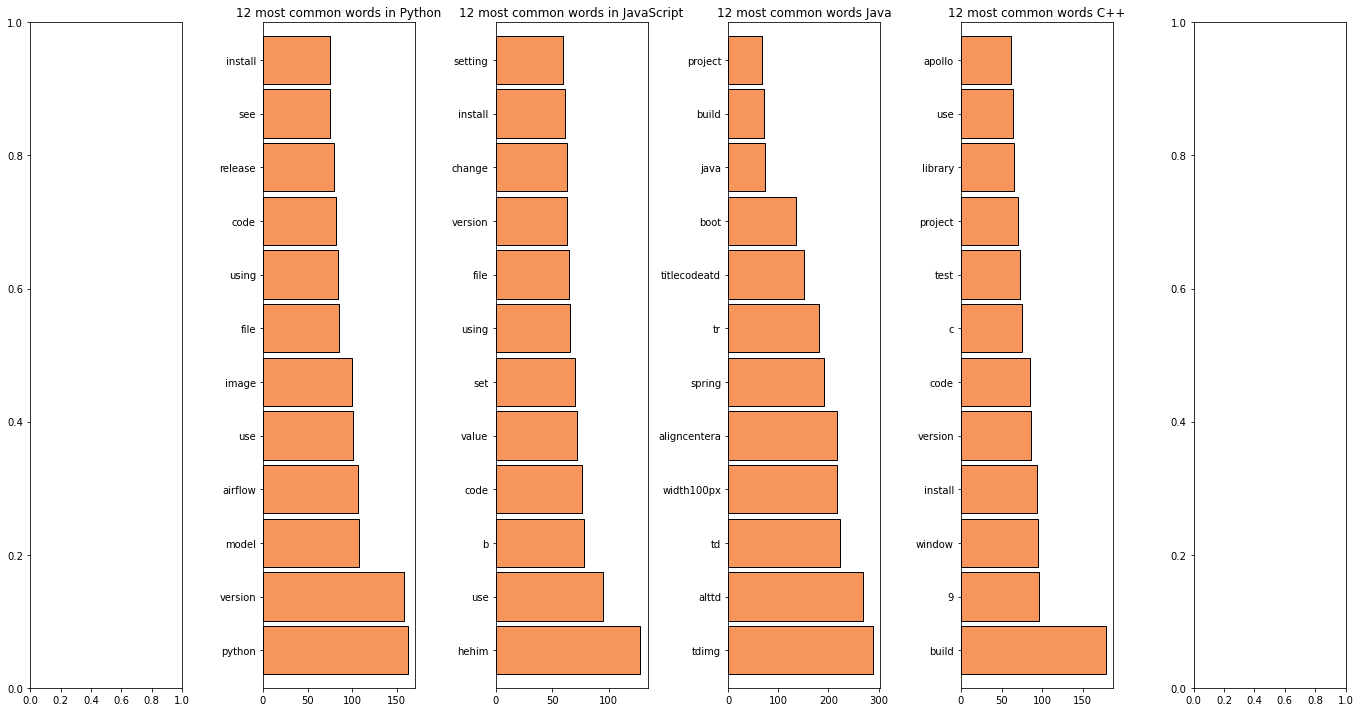

In [34]:
#visualize most common words per languages
explore.most_common_words(df)

## Hypothesis

## Check if there is difference in mean number of words by language
- Ha: There is no difference between mean words of each language when compared with mean word count of group.
- Ho: There is difference between the mean words of each language when compared with mean word count of group.

 = 0.05

In [37]:
#take a look at the word count
mean_word_count = df.groupby("is_top_language").word_count.mean()
mean_word_count

is_top_language
C++           385.300000
Java          315.323529
JavaScript    442.700000
Python        594.791667
Name: word_count, dtype: float64

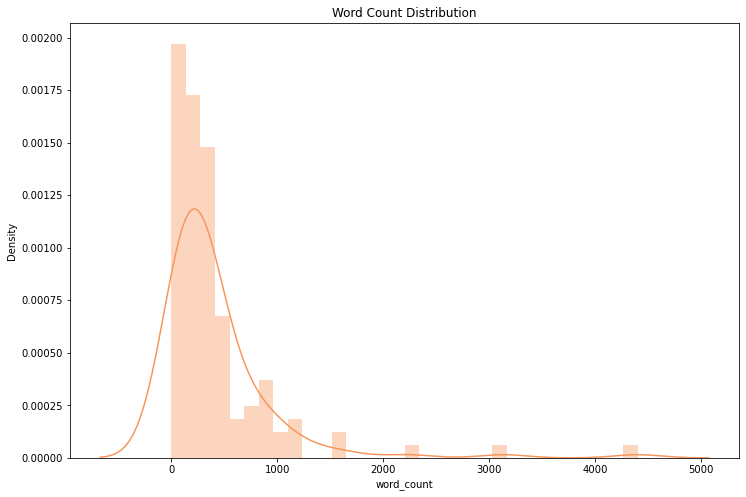

In [36]:
#plot a hist to visualize word count distribution
explore.plot_word_count_distribution(df)

- Plot normally distributed and left skewed meaning that most words are less than the average

In [39]:
languages = df.is_top_language.unique()
for language in languages:
    subgroup = df[df.is_top_language == language].word_count
    tsat, p = stats.ttest_1samp(subgroup, df.word_count.mean())
    print(f" The p value for {language} is {p:.2f}")

 The p value for JavaScript is 0.89
 The p value for Python is 0.26
 The p value for Java is 0.09
 The p value for C++ is 0.54


- JavaScript has a significant word count compared to other languages

## Modeling